# Imports

In [ ]:
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

# Demo 1

In [ ]:
def dickey_fuller_test(time_series):
    """
    Fonction qui permet de tester la stationnarité d'une série temporelle

    :param time_series: Série temporelle

    :return: True si la série est stationnaire, False sinon
    """

    result_ad = adfuller(time_series)
    adf = result_ad[0]
    pvalue = result_ad[1]
    print(f"ADF Statistic: {adf}")
    print(f"p-value: {pvalue}")

    if pvalue < 0.05:
        print("Série stationnaire")
        return True
    else:
        print("Série non-stationnaire")
        return False

In [57]:
# Création de trois séries temporelles différentes
np.random.seed(42)
n = 200

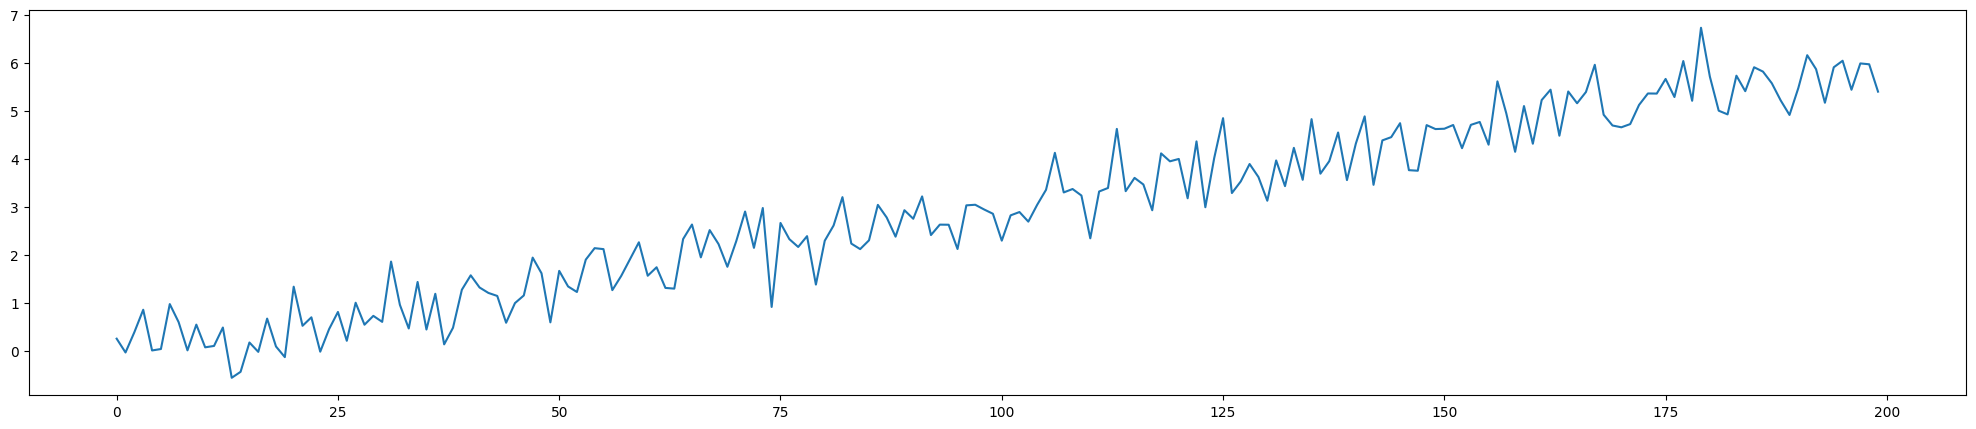

In [61]:
# 1. Série avec forte tendance
np.random.seed(42)
t = np.arange(n)
trend = 0.03 * t + np.random.normal(0, 0.5, n)

plt.figure(figsize=(25,5))
plt.plot(trend)
plt.show()

## Stationnarisation

In [73]:
ts_stationarized = pd.Series(trend).copy()

while not dickey_fuller_test(ts_stationarized):
    ts_stationarized = ts_stationarized.diff().dropna()

ADF Statistic: -0.18257938846789176
p-value: 0.9405665017482011
Série non-stationnaire
ADF Statistic: -7.662015790653436
p-value: 1.6789046470356354e-11
Série stationnaire


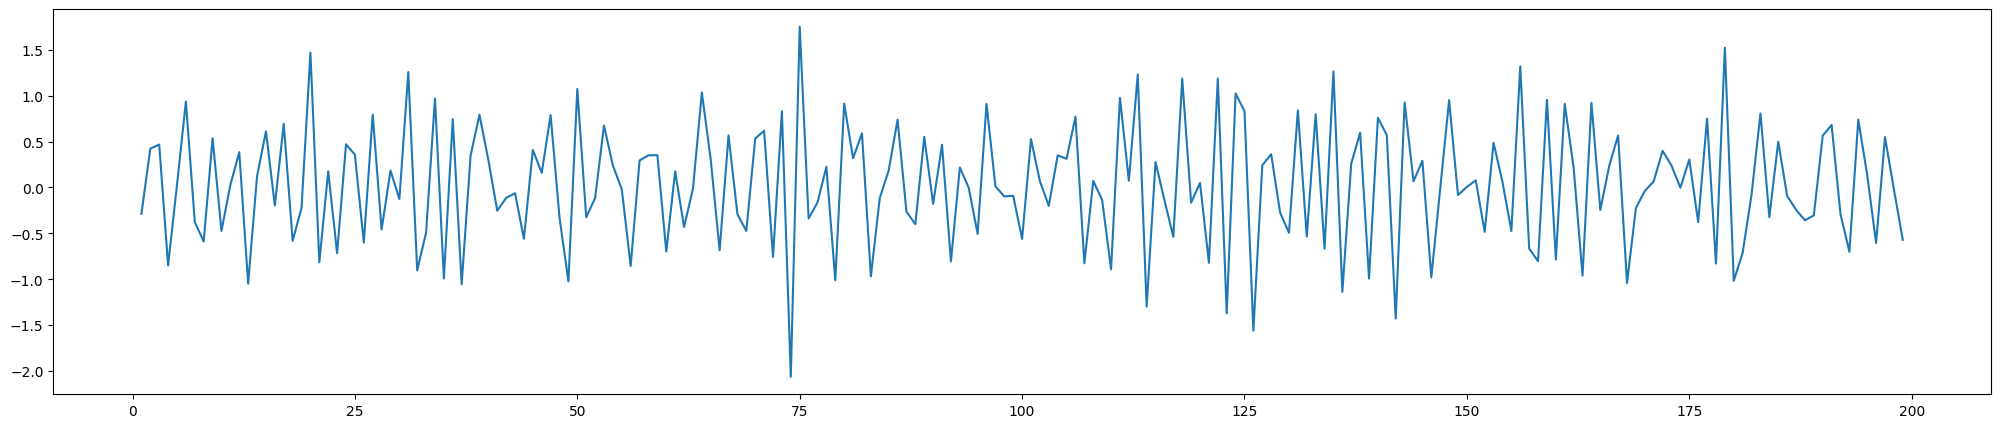

In [74]:
plt.figure(figsize=(25,5))
plt.plot(ts_stationarized)
plt.show()

In [160]:
n = 200

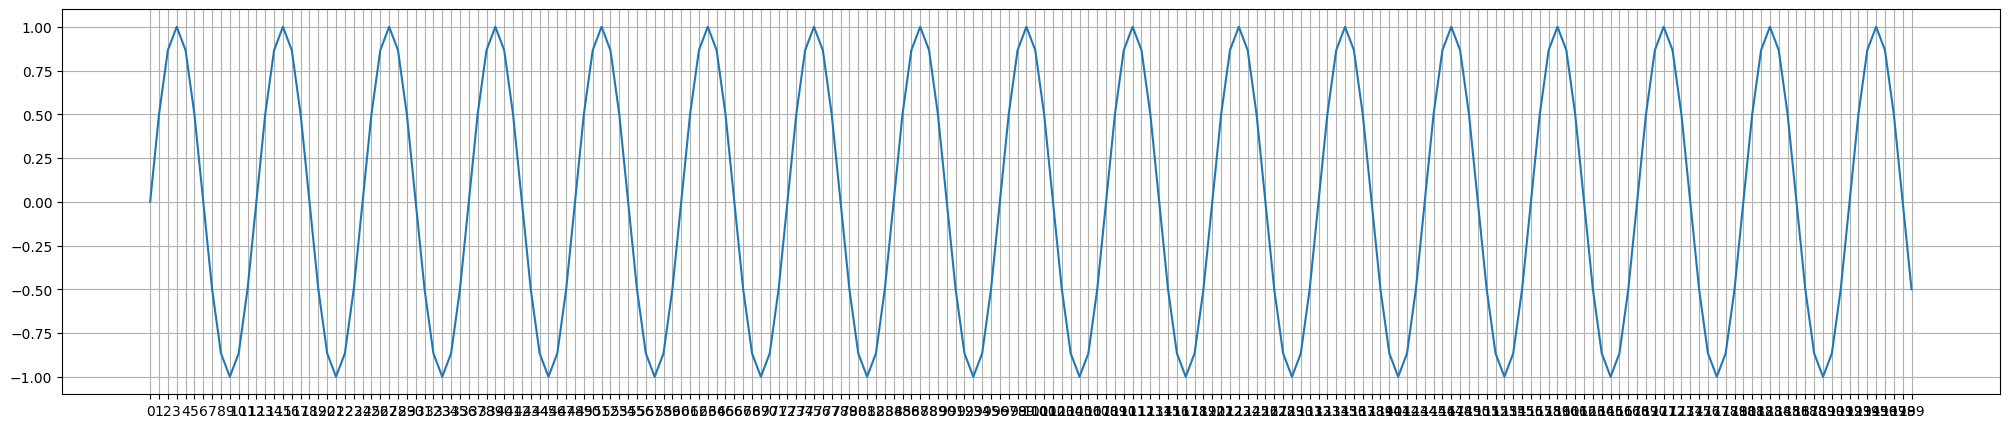

In [205]:
# 2. Série avec saisonnalité
np.random.seed(42)
t = np.arange(n)
seasonal = np.sin(2 * np.pi * t / 12)# + np.random.normal(0, 0.01, n)
#seasonal += np.sin(2 * np.pi * t / 36) # rajout d'une composante

plt.figure(figsize=(25,5)) 
plt.plot(seasonal)
plt.grid()
plt.xticks(np.arange(0, 200, 1))
plt.show()

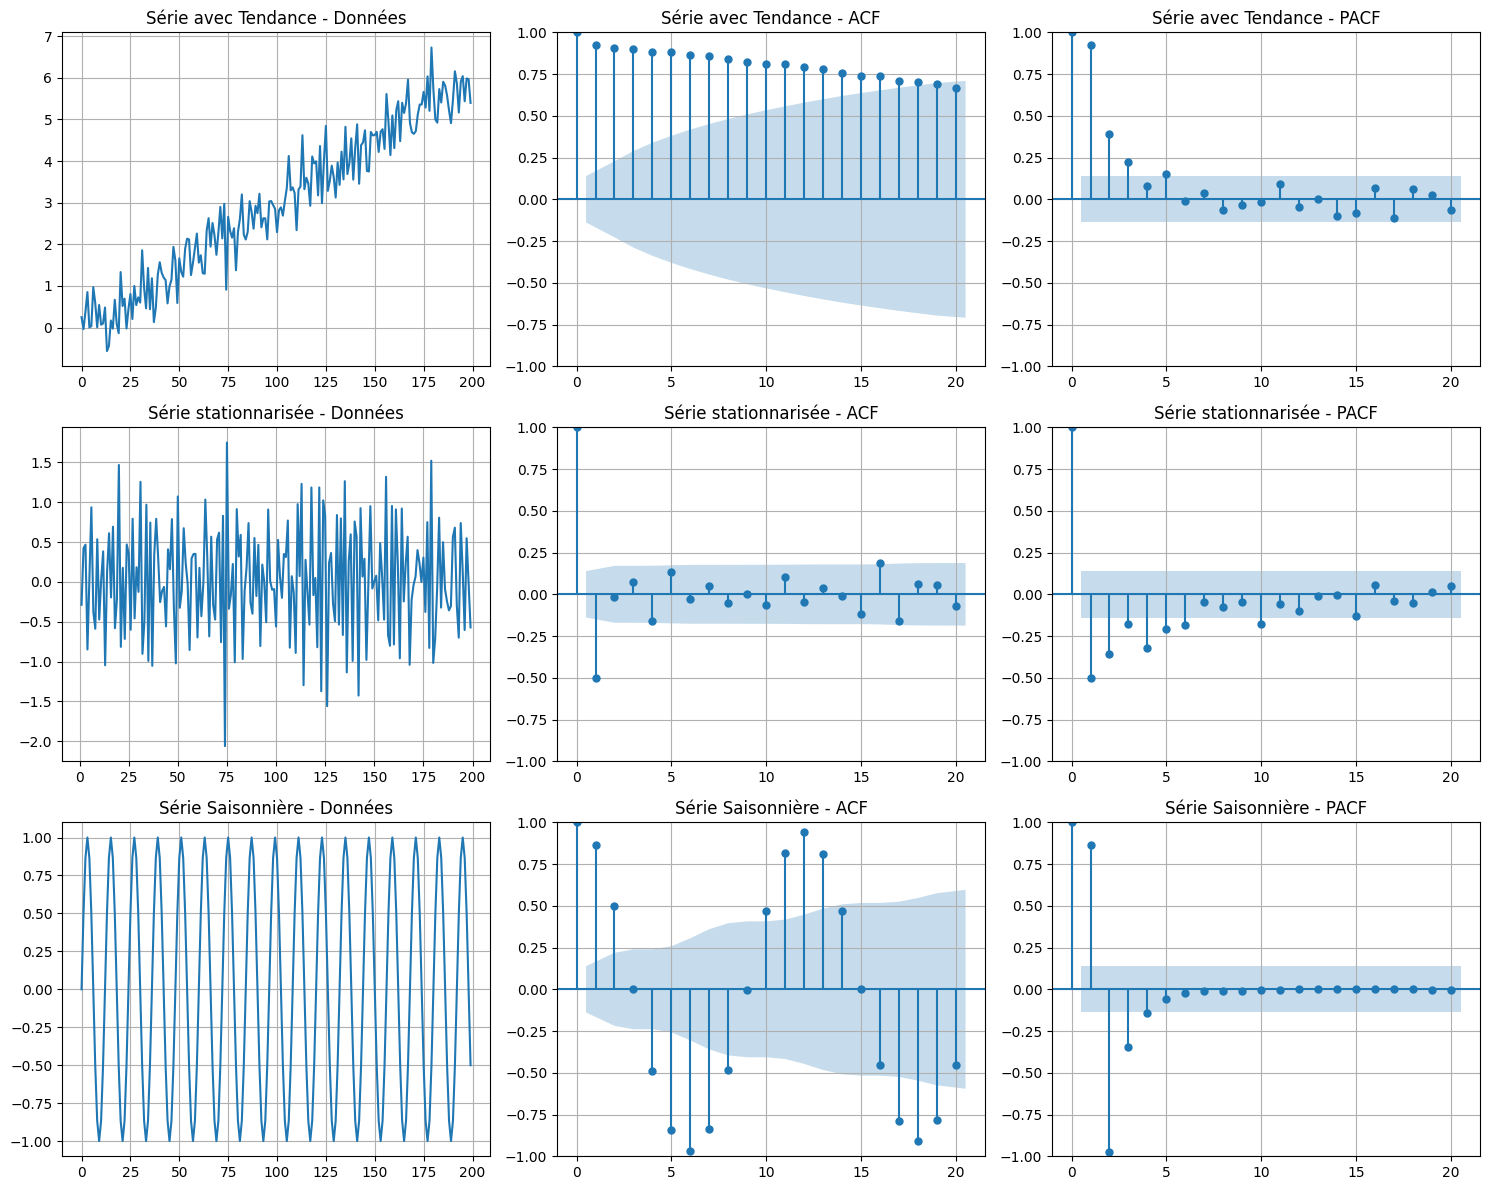

In [216]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
lags = 20

series_list = [trend, ts_stationarized, seasonal]
titles = ['Série avec Tendance', "Série stationnarisée",'Série Saisonnière']

for i, (series, title) in enumerate(zip(series_list, titles)):
    axes[i, 0].plot(series)
    axes[i, 0].set_title(f'{title} - Données')
    axes[i, 0].grid(True)
    
    # ACF
    plot_acf(series, lags=lags, ax=axes[i, 1], title=f'{title} - ACF')
    axes[i, 1].grid(True)
    
    # PACF
    plot_pacf(series, lags=lags, ax=axes[i, 2], title=f'{title} - PACF')
    axes[i, 2].grid(True)

plt.tight_layout()

<BarContainer object of 20 artists>

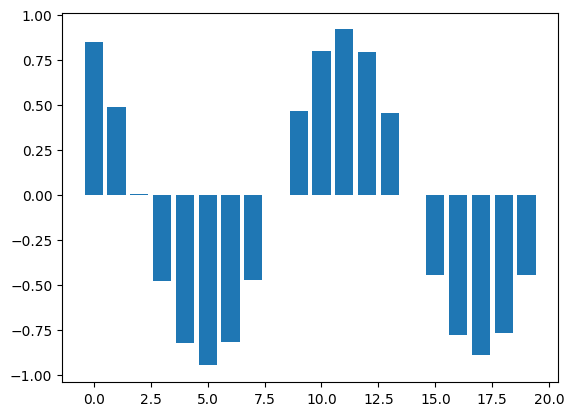

In [110]:
plt.bar(np.arange(20), acf(seasonal, nlags=20)[1:])

In [ ]:
def test_period_kruskal(data, period):
    """
    Teste une période spécifique avec Kruskal-Wallis

    :param data: Données
    :param period: Période

    :return: Statistique de test, p-value
    """

    #Groups
    groups = [data[i::period] for i in range(period)]
    
    h_stat, p_val = stats.kruskal(*groups)
    return h_stat, p_val

In [213]:
periods_to_test = range(2, 100)  
h_values = []
p_values = []

for period in periods_to_test:
    h_stat, p_val = test_period_kruskal(seasonal, period)

    h_values.append(h_stat)
    p_values.append(p_val)

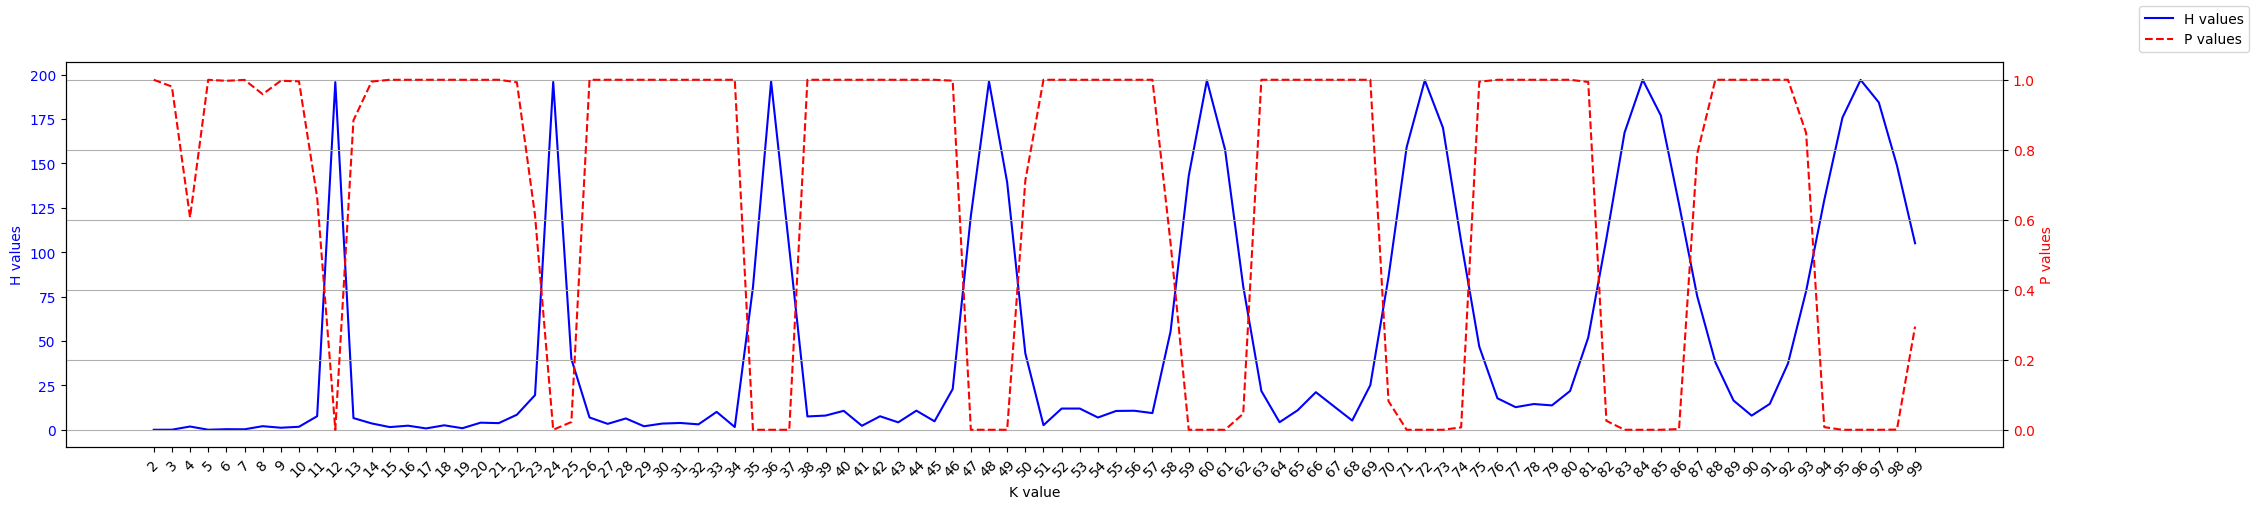

In [222]:
fig, ax1 = plt.subplots()

fig.set_size_inches(25, 5)

ax1.plot(periods_to_test, h_values, 'b-', label="H values")
ax1.set_xlabel("K value")
ax1.set_ylabel("H values", color="b")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()
ax2.plot(periods_to_test, p_values, 'r--', label="P values")
ax2.set_ylabel("P values", color="r")
ax2.tick_params(axis="y", labelcolor="r")


ax1.set_xticks(periods_to_test)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)

plt.grid(periods_to_test)

fig.legend(loc="upper right")

plt.show()